<a href="https://colab.research.google.com/github/ani12345678860/tele_churn/blob/main/tele_customer_churn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv("/content/drive/MyDrive/Telco-Customer-Churn.csv")

In [13]:
df.head() #First five rows of dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.tail() #last five rows of dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [15]:
df.shape

(7043, 21)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce') #changing datatype of totalcharges from object to numeric

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df.dropna(inplace=True)

In [20]:
print(df.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [21]:
churn_rate=df["Churn"].value_counts(normalize=True)["Yes"]
print(churn_rate)

0.26578498293515357


In [22]:
churn_rate=df["Churn"].value_counts(normalize=True)["No"]
print(churn_rate)

0.7342150170648464


In [23]:
avg_monthly=df.groupby("Churn")["MonthlyCharges"].mean()


In [24]:
avg_monthly=avg_monthly.reset_index()

In [25]:
avg_monthly

,Churn,MonthlyCharges
0,No,61.307408
1,Yes,74.441332


In [26]:
contract_by_churn=df.groupby(['Contract','Churn']).size()

In [27]:
contract_by_churn=contract_by_churn.reset_index()

In [28]:
contract_by_churn.rename(columns={0:'Count'},inplace=True)

In [29]:
contract_by_churn

,Contract,Churn,Count
0,Month-to-month,No,2220
1,Month-to-month,Yes,1655
2,One year,No,1306
3,One year,Yes,166
4,Two year,No,1637
5,Two year,Yes,48


In [30]:
pd.crosstab(df['Contract'],df['Churn'],normalize="index")*100

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.722826,11.277174
Two year,97.151335,2.848665


<Axes: xlabel='Contract', ylabel='count'>

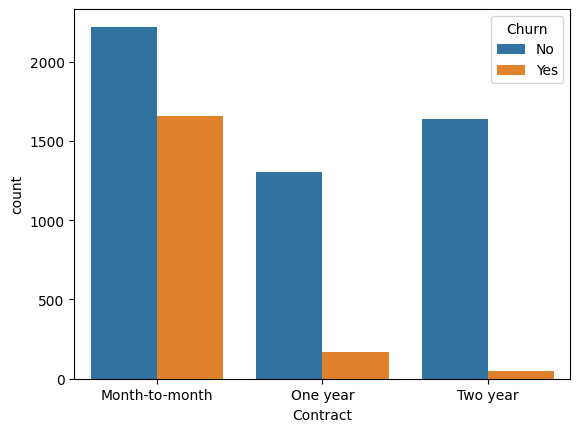

In [31]:
sns.countplot(x="Contract",hue="Churn",data=df)

In [32]:
def tenure_group(tenure):
  if tenure <12:
    return "0-1 Year"
  elif tenure <24:
    return "1-2 Years"
  else:
    return "2+ Years"


In [33]:
df["Tenure_group"]=df["tenure"].apply(tenure_group)

In [34]:
print(df["Tenure_group"])

0       0-1 Year
1       2+ Years
2       0-1 Year
3       2+ Years
4       0-1 Year
          ...   
7038    2+ Years
7039    2+ Years
7040    0-1 Year
7041    0-1 Year
7042    2+ Years
Name: Tenure_group, Length: 7032, dtype: object


In [35]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1 Year
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2+ Years
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1 Year
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2+ Years
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1 Year


In [36]:
churn_by_group = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()
churn_by_group.sort_values(by='Yes', ascending=False)

Churn,No,Yes
InternetService,,
Fiber optic,0.581072,0.418928
DSL,0.810017,0.189983
No,0.925658,0.074342


In [37]:
df['HighValueCustomer'] = df['MonthlyCharges'].apply(lambda x: 'Yes' if x > 80 else 'No')

In [38]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group,HighValueCustomer
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1 Year,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,2+ Years,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1 Year,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2+ Years,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1 Year,No


In [39]:
df.pivot_table(values='MonthlyCharges', index='Contract', columns='Churn', aggfunc='mean')

Churn,No,Yes
Contract,,
Month-to-month,61.462635,73.019396
One year,62.540926,85.050904
Two year,60.112798,86.777083


In [40]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group,HighValueCustomer


In [41]:
df['OnlineSecurity']=df['OnlineSecurity'].replace('No internet service','No')

In [42]:
df['TechSupport']=df['TechSupport'].replace('No internet service','No')

In [45]:
print(df['PaymentMethod'].unique())

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [48]:
correlation = df[['MonthlyCharges', 'TotalCharges', 'tenure']].corr()

<Axes: >

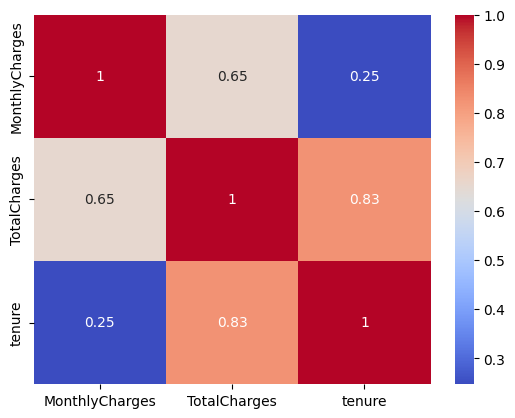

In [49]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [52]:
df['InternetService'].value_counts().reset_index()

,InternetService,count
0,Fiber optic,3096
1,DSL,2416
2,No,1520


In [55]:
df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

Churn,No,Yes
SeniorCitizen,,
0,4497,1393
1,666,476


In [59]:
retention_rate = df['Churn'].value_counts(normalize=True)['No'] * 100
print(f"Retention Rate: {retention_rate:.2f}%")

Retention Rate: 73.42%


<Axes: xlabel='Churn', ylabel='Contract'>

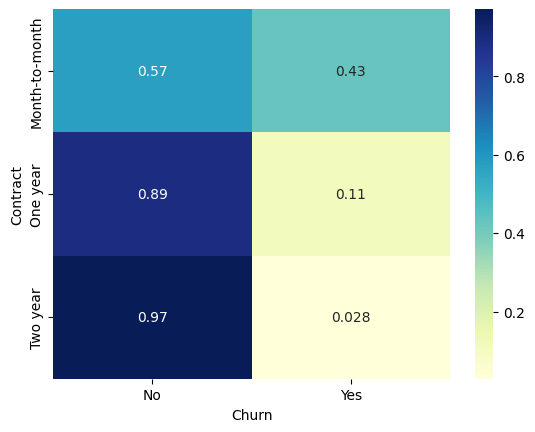

In [61]:
cat_vars = ['Contract', 'PaymentMethod', 'InternetService', 'SeniorCitizen']
sns.heatmap(pd.crosstab(df[cat_vars[0]], df['Churn'], normalize='index'), annot=True, cmap='YlGnBu')

In [62]:
df['CLV'] = df['MonthlyCharges'] * df['tenure']

In [63]:
df['CLV']

,CLV
0,29.85
1,1936.30
2,107.70
3,1903.50
4,141.40
...,...
7038,2035.20
7039,7430.40
7040,325.60
7041,297.60


In [64]:
df['ChargeLevel'] = pd.cut(df['MonthlyCharges'], bins=[0, 35, 70, 105],
                           labels=['Low', 'Medium', 'High'])


In [65]:
df['ChargeLevel']

,ChargeLevel
0,Low
1,Medium
2,Medium
3,Medium
4,High
...,...
7038,High
7039,High
7040,Low
7041,High


In [68]:
summary = df.groupby('Churn')[['MonthlyCharges', 'TotalCharges', 'tenure']].agg(['mean', 'median'])
print(summary)

      MonthlyCharges        TotalCharges              tenure       
                mean median         mean   median       mean median
Churn                                                              
No         61.307408  64.45  2555.344141  1683.60  37.650010   38.0
Yes        74.441332  79.65  1531.796094   703.55  17.979133   10.0


In [69]:
pd.crosstab([df['InternetService'], df['Contract']], df['Churn'], normalize='index') * 100

Churn                                  No        Yes
InternetService Contract                            
DSL             Month-to-month  67.784137  32.215863
                One year        90.701754   9.298246
                Two year        98.073836   1.926164
Fiber optic     Month-to-month  45.394737  54.605263
                One year        80.705009  19.294991
                Two year        92.773893   7.226107
No              Month-to-month  81.106870  18.893130
                One year        97.520661   2.479339
                Two year        99.210111   0.789889

<Axes: xlabel='Churn', ylabel='tenure'>

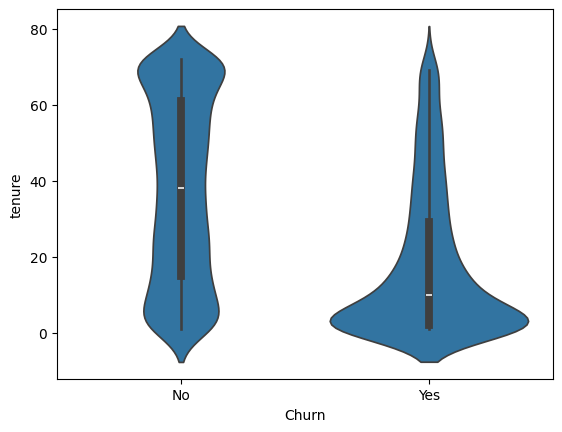

In [70]:
sns.violinplot(x='Churn', y='tenure', data=df)

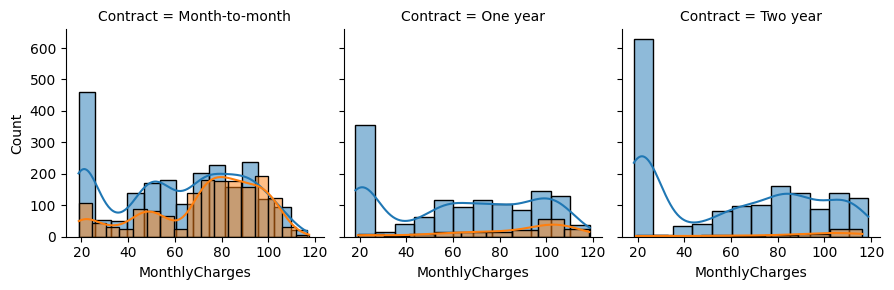

In [71]:
g = sns.FacetGrid(df, col="Contract", hue="Churn")
g.map(sns.histplot, "MonthlyCharges", kde=True)

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

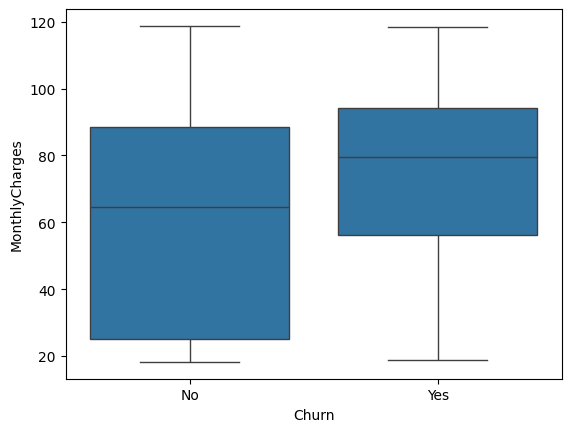

In [73]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

<Axes: xlabel='tenure', ylabel='Count'>

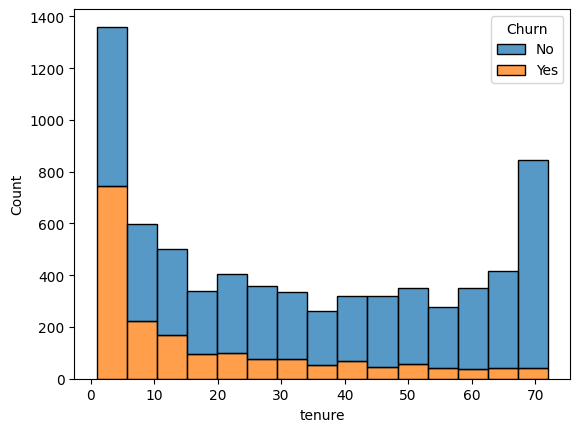

In [74]:
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack')